# **PySpark for joining two datasets**

In [1]:
## can mount google colab to the drive
# from google.colab import drive
# drive.mount('/content/drive')

Installing pyspark module

In [2]:
#!pip install pyspark

Importing the modules

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max, struct
import matplotlib.pyplot as plts

creating spark session

In [4]:
spark = SparkSession.builder.appName("spark_app").getOrCreate()

importing the *Listenings.csv* file:

In [5]:
listening_csv_path = "listenings.csv" # not uploaded to the repository due to large file
listening_df = spark.read.format("CSV").option("inferSchema", True).option("header",True).load(listening_csv_path)

check the data:

In [6]:
listening_df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

delete useless columns:

In [7]:
listening_df = listening_df.drop("date")

drop the null rows:

In [8]:
listening_df = listening_df.na.drop()

check the dataset again:

In [9]:
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

see the schema:

In [10]:
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



see the shape of our dataframe:

In [11]:
shape = (listening_df.count(), len(listening_df.columns))
print(shape)

(13758905, 4)


**Query #0:**
select two columns: track and artist

In [12]:
q0 = listening_df.select("artist","track")
q0.show()

+---------------+--------------------+
|         artist|               track|
+---------------+--------------------+
|       Jessie J|           Price Tag|
|       Jessie J|Price Tag (Acoust...|
|          Robyn|Be Mine! (Ballad ...|
|          Kelis|            Acapella|
|      The Tease|   I'm Not Invisible|
|       MSTRKRFT|Bounce (Feat NORE...|
|        Rihanna|Don't Stop The Mu...|
|      Meshuggah|               ObZen|
|         Gojira|   Yama's Messengers|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|        In Deference|
|    Decapitated|      Post(?)organic|
|   Dom & Roland|        Mind Feeders|
|Cannibal Corpse|Necrosadistic War...|
|   Dom & Roland|     Dance All Night|
|   Dom & Roland|          Late Night|
|   Dom & Roland|          Freak Seen|
|   Dom & Roland|Paradrenasite (Hi...|
|   Dom & Roland|               Rhino|
+---------------+--------------------+
only showing top 20 rows



**Query #1**:

find all of the records of those users who have listened to ***Rihanna***

In [13]:
q1 = listening_df.select("*").filter(listening_df.artist == "Rihanna")
q1.show()

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
|      0rdos|There's a Thug in...|Rihanna|    Music of the Sun|
|      0rdos|                Rush|Rihanna|    Music of the Sun|
|      0rdos|              Let Me|Rihann

**Query #2:**

find top 10 users who are fan of ***Rihanna***

In [14]:
q2 = listening_df.select("user_id").filter(listening_df.artist == "Rihanna")
q2.groupBy("user_id").agg(count("user_id").alias("count")).orderBy(desc("count")).limit(10).show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        thiessu|  179|
|    eyessetkyle|  166|
|           adxx|  164|
|missnumberthree|  156|
|helloiamnatalie|  128|
|          nmjnb|  124|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|     mixedvibes|  120|
|       AndyKitt|  115|
+---------------+-----+



**Query #3:**

find top 10 famous tracks

In [15]:
q3 = listening_df.select("artist","track").groupBy("artist","track").agg(count("*").alias("count"))
q3.orderBy(desc("count")).limit(10).show()

+--------------+----------------+-----+
|        artist|           track|count|
+--------------+----------------+-----+
| Justin Bieber|           Sorry| 3381|
|Arctic Monkeys|Do I Wanna Know?| 2865|
|      Bon Iver|     Skinny Love| 2836|
|          Zayn|      PILLOWTALK| 2701|
|   The Killers|   Mr Brightside| 2690|
|       Rihanna|            Work| 2646|
|      Bastille|         Pompeii| 2606|
|Mumford & Sons| Little Lion Man| 2520|
|Mumford & Sons|        The Cave| 2485|
| Justin Bieber|   Love Yourself| 2481|
+--------------+----------------+-----+



**Query #4:**

find top 10 famous tracks of ***Rihanna***

In [16]:
q4 = listening_df.select("artist","track").filter(listening_df.artist == "Rihanna")
q4 = q4.groupBy("artist","track").agg(count("*").alias("count")).orderBy(desc("count"))
q4.limit(10).show()

+-------+--------------------+-----+
| artist|               track|count|
+-------+--------------------+-----+
|Rihanna|                Work| 2646|
|Rihanna|Only Girl (In the...| 1749|
|Rihanna|We Found Love (fe...| 1575|
|Rihanna|                 S&M| 1307|
|Rihanna|            Rude Boy| 1303|
|Rihanna|            Diamonds| 1224|
|Rihanna|      Kiss it Better|  945|
|Rihanna| Where Have You Been|  844|
|Rihanna|Cheers (Drink to ...|  697|
|Rihanna|           Needed Me|  679|
+-------+--------------------+-----+



**Query #5:**

find top 10 famous albums

In [17]:
q5 = listening_df.select("artist","album").groupBy("artist","album")
q5.agg(count("*").alias("count")).orderBy(desc("count")).limit(10).show()

+--------------------+--------------------+-----+
|              artist|               album|count|
+--------------------+--------------------+-----+
|          Kanye West|   The Life Of Pablo|22310|
|              The xx|                  xx|14195|
|      Arctic Monkeys|                  AM|14090|
|               alt-J|     An Awesome Wave|13635|
|      Mumford & Sons|        Sigh No More|13543|
|      Arctic Monkeys|Whatever People S...|12731|
|            Bon Iver|            For Emma|11994|
|              Grimes|          Art Angels|11655|
|Florence + the Ma...|               Lungs|11362|
|               Adele|                  21|11215|
+--------------------+--------------------+-----+



importing the ***genre.csv*** file:

In [18]:
genre_csv_path = "genre.csv"
genre_df = spark.read.format("csv").option("inferSchema", True).option("header", True).load(genre_csv_path)

check the data

In [19]:
genre_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



In [20]:
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

inner join these two data frames

In [21]:
data = listening_df.join(genre_df, how = "inner", on = ["artist"])
data.show()

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|       Ro

**Query #6**

find top 10 users who are fan of ***pop*** music

In [22]:
q6 = data.select("user_id").filter(data.genre == "pop").groupBy("user_id")
q6 = q6.agg(count("*").alias("count")).orderBy(desc("count")).limit(10).show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
+---------------+-----+



**Query #7**

find top 10 famous genres

In [23]:
q7 = data.select("genre").groupBy("genre").agg(count("*").alias("count"))
q7.orderBy(desc("count")).limit(10).show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+



**Query #8**

find out each user favourite genre

In [24]:
q8_1 = data.select("user_id","genre").groupBy("user_id","genre").agg(count("*").alias("count"))
q8_1.orderBy("user_id").show()

+-------+--------------------+-----+
|user_id|               genre|count|
+-------+--------------------+-----+
| --Seph|               Bjorn|    8|
| --Seph| Capella Istropol...|    2|
| --Seph|      Alice Sara Ott|    2|
| --Seph| Arnór Dan & Doug...|    1|
| --Seph| Charis Henry & M...|    4|
| --Seph|        experimental|    3|
| --Seph| London Symphony ...|    1|
| --Seph|             Hittman|    4|
| --Seph| Richard Armitage...|    1|
| --Seph|     Hilko Schomerus|    1|
| --Seph|    Sir James Galway|    1|
| --Seph|           Disciples|    1|
| --Seph|          Snoop Dogg|    4|
| --Seph| Ne-Yo & Nicky Ro...|    1|
| --Seph|       chamber music|    1|
| --Seph|                 RBX|    4|
| --Seph|          electronic|    6|
| --Seph|             Rihanna|    1|
| --Seph|          soundtrack|    1|
| --Seph|   Alesso Feat Hurts|    1|
+-------+--------------------+-----+
only showing top 20 rows



In [25]:
q8_2 = q8_1.groupBy("user_id").agg(max(struct(col("count"), col("genre"))).alias("max"))
# q8_2.show()
q8_2.select(col("user_id"),col("max.genre")).show()

+---------------+-----------+
|        user_id|      genre|
+---------------+-----------+
|      --Shinn--|       rock|
|          -DeWp|    hip hop|
|        -Gemma-|british pop|
|   -Gingergirl-|        pop|
| -SleepingStar-|black metal|
|-invinoveritas-|     comedy|
|         -laura|        rap|
|         -wasp-|       rock|
|   -x-kelsey-x-|        pop|
|        00Lemon|       rock|
|      00fieldsy|       rock|
|     01higginsr|    hip hop|
|      03swalker|       rock|
|        0503611|       rock|
|        0Chris0|    hip hop|
|        0Laura0| industrial|
|         0ptriX|       rock|
|    12thmarquis|       rock|
|           1936|        pop|
|        1Marley|        r&b|
+---------------+-----------+
only showing top 20 rows



**Query #9**

find out how many pop,rock,metal and hip hop singers we have

and then visulize it using bar chart

In [26]:
q9 = genre_df.select("genre").filter((col("genre") == "pop") | (col("genre") == "rock") | (col("genre") == "metal") | (col("genre") == "hip hop"))
q9 = q9.groupBy("genre").agg(count("*").alias("count"))
q9.show()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



Visualize the results using ***matplotlib***

In [27]:
q9_list = q9.collect()
q9_list

[Row(genre='pop', count=6960),
 Row(genre='hip hop', count=4288),
 Row(genre='metal', count=1854),
 Row(genre='rock', count=9066)]

In [28]:
q9.select("genre").show()

+-------+
|  genre|
+-------+
|    pop|
|hip hop|
|  metal|
|   rock|
+-------+



In [29]:
lables = [row["genre"] for row in q9_list]
counts = [row["count"] for row in q9_list]

In [30]:
print(lables)
print(counts)

['pop', 'hip hop', 'metal', 'rock']
[6960, 4288, 1854, 9066]


now lets visualize these two lists using a bar chart

<BarContainer object of 4 artists>

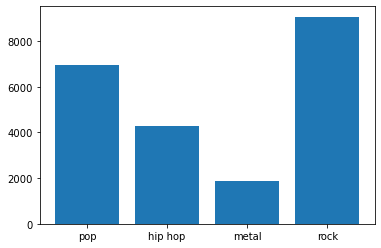

In [31]:
plts.bar(lables, counts)